# Roller Coaster

## Project Requirements

1. Roller coasters are thrilling amusement park rides designed to make you squeal and scream! They take you up high, drop you to the ground quickly, and sometimes even spin you upside down before returning to a stop. Today you will be taking control back from the roller coasters and visualizing data covering international roller coaster rankings and roller coaster statistics.

   Roller coasters are often split into two main categories based on their construction material: **wood** or **steel**. Rankings for the best wood and steel roller coasters from the 2013 to 2018 [Golden Ticket Awards](http://goldenticketawards.com) are provded in `'Golden_Ticket_Award_Winners_Wood.csv'` and `'Golden_Ticket_Award_Winners_Steel.csv'`, respectively. Load each csv into a DataFrame and inspect it to gain familiarity with the data.

In [1]:
# 1 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# load rankings data
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

# Inspect data frames
wood.head(), steel.describe()

(   Rank          Name                       Park             Location  \
 0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
 1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
 2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
 3     4    The Voyage              Holiday World    Santa Claus, Ind.   
 4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   
 
            Supplier  Year Built  Points  Year of Rank  
 0               CCI        2000    1333          2013  
 1           Intamin        2006    1302          2013  
 2  Dinn/PTC-Schmeck        1985    1088          2013  
 3     Gravity Group        2006    1086          2013  
 4              GCII        2004     923          2013  ,
              Rank   Year Built       Points  Year of Rank
 count  180.000000   180.000000   180.000000    180.000000
 mean    22.127778  2004.655556   325.433333   2016.500000
 std     15.186377     9.511723   

2. Write a function that will plot the ranking of a given roller coaster over time as a line. Your function should take a roller coaster's name and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as the roller coaster name and the wood ranking DataFrame. What issue do you notice? Update your function with an additional argument to alleviate the problem, and retest your function.

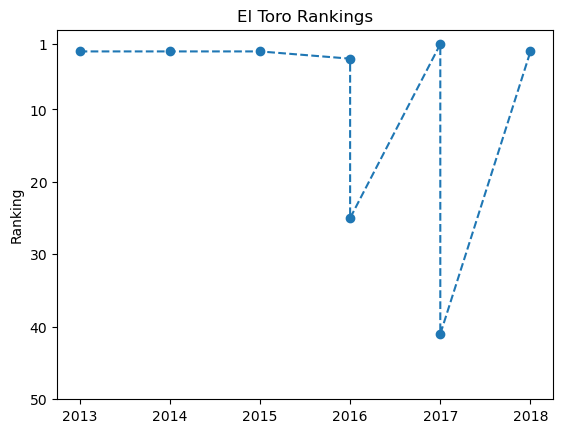

<Figure size 640x480 with 0 Axes>

In [2]:
# 2
# Create a function to plot rankings over time for 1 roller coaster
def plot_coaster_ranking(coaster_name, rankings_df):
    
    
    x_values = rankings_df[rankings_df["Name"] == coaster_name]['Year of Rank']
    y_values = rankings_df[rankings_df["Name"] == coaster_name]['Rank']
    
    fig, ax = plt.subplots()
    plt.plot(x_values, y_values, linestyle='--', marker='o')
    ax.set_yticks([1,10,20,30,40,50])
    ax.invert_yaxis()
    plt.title("{} Rankings".format(coaster_name))
    plt.ylabel('Ranking')
    plt.show()
    plt.clf()
# Create a plot of El Toro ranking over time
plot_coaster_ranking('El Toro', wood)

In [3]:
print(wood[wood["Name"] == "El Toro"]['Park'].values)

['Six Flags Great Adventure' 'Six Flags Great Adventure'
 'Six Flags Great Adventure' 'Six Flags Great Adventure'
 'Freitzeitpark Plohn' 'Six Flags Great Adventure' 'Freitzeitpark Plohn'
 'Six Flags Great Adventure']


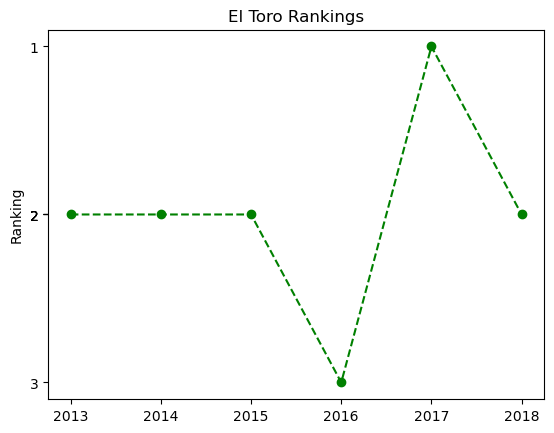

<Figure size 640x480 with 0 Axes>

In [4]:
# Create a function to plot rankings over time for 1 roller coaster
def plot_coaster_ranking_park(coaster_name, park_name, rankings_df):
  coaster_rankings = rankings_df[(rankings_df['Name'] == coaster_name) & (rankings_df['Park'] == park_name)]
  fig, ax = plt.subplots()
  ax.plot(coaster_rankings['Year of Rank'],
          coaster_rankings['Rank'],
          c = 'g', linestyle='--', marker='o')
  ax.set_yticks(coaster_rankings['Rank'].values)
  ax.invert_yaxis()
  plt.title("{} Rankings".format(coaster_name))
  plt.ylabel('Ranking')
  plt.show()
  plt.clf()

# Create a plot of El Toro ranking over time
plot_coaster_ranking_park('El Toro', 'Six Flags Great Adventure', wood)

3. Write a function that will plot the ranking of two given roller coasters over time as lines. Your function should take both roller coasters' names and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with `"El Toro"` as one roller coaster name, `"Boulder Dash"` as the other roller coaster name, and the wood ranking DataFrame. What issue do you notice? Update your function with two additional arguments to alleviate the problem, and retest your function.

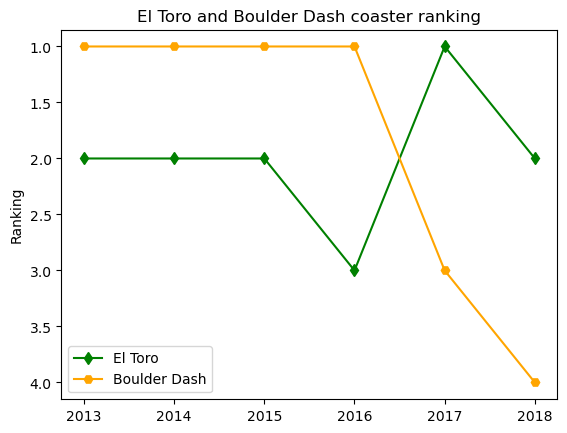

<Figure size 640x480 with 0 Axes>

In [5]:
# 3
# Create a function to plot rankings over time for 2 roller coasters
def plot_2_coaster_rankings(coaster_1_name, park_1_name, coaster_2_name, park_2_name, rankings_df):
    
    coaster1 = rankings_df[(rankings_df["Name"] == coaster_1_name) & (rankings_df["Park"] == park_1_name)]
    coaster2 = rankings_df[(rankings_df["Name"] == coaster_2_name) & (rankings_df["Park"] == park_2_name)]
    
    fig, ax = plt.subplots()
    plt.plot(coaster1['Year of Rank'],coaster1['Rank'], c='g', marker ='d')
    plt.plot(coaster2['Year of Rank'],coaster2['Rank'], c='orange', marker ='H')
    
    ax.invert_yaxis()
    plt.ylabel('Ranking')
    plt.title('{} and {} coaster ranking'.format(coaster_1_name, coaster_2_name))
    plt.legend([coaster_1_name, coaster_2_name])
    
    plt.show()
    plt.clf()
    
# Create a plot of El Toro and Boulder Dash roller coasters
plot_2_coaster_rankings('El Toro','Six Flags Great Adventure','Boulder Dash','Lake Compounce',wood)

4. Write a function that will plot the ranking of the top `n` ranked roller coasters over time as lines. Your function should take a number `n` and a ranking DataFrame as arguments. Make sure to include informative labels that describe your visualization.

   For example, if `n == 5`, your function should plot a line for each roller coaster that has a rank of `5` or lower.
   
   Call your function with a value of `n` and either the wood ranking or steel ranking DataFrame.

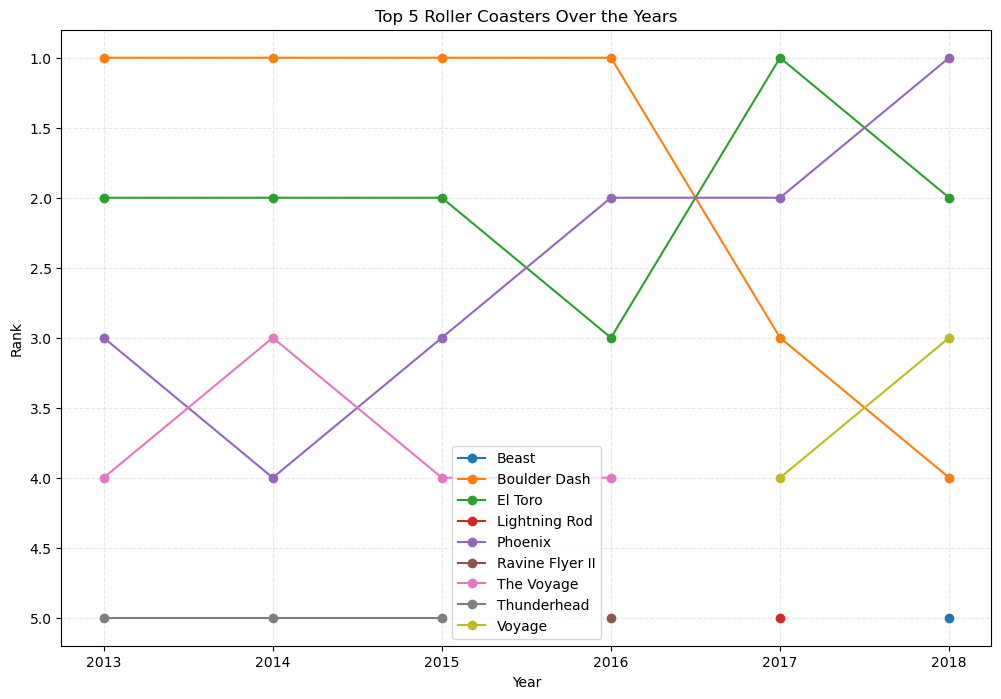

In [6]:
#chatgpt answer
def plot_top_n_ranks(data, top_n):
    # Group the data by 'Year of Rank' and get the top N entries for each group
    top_ranks = data.groupby('Year of Rank').apply(lambda x: x.head(top_n))

    # Plotting
    plt.figure(figsize=(12, 8))

    #group top n ranking by name
    for name, group in top_ranks.groupby('Name'):
        plt.plot(group['Year of Rank'], group['Rank'], label=name, marker='o')

    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'Top {top_n} Roller Coasters Over the Years')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.gca().invert_yaxis()
    plt.show()

# Assuming 'wood' is your DataFrame
plot_top_n_ranks(wood, 5)

5. Now that you've visualized rankings over time, let's dive into the actual statistics of roller coasters themselves. [Captain Coaster](https://captaincoaster.com/en/) is a popular site for recording roller coaster information. Data on all roller coasters documented on Captain Coaster has been accessed through its API and stored in `roller_coasters.csv`. Load the data from the csv into a DataFrame and inspect it to gain familiarity with the data.

In [8]:
# 5
# load roller coaster data
roller_coasters = pd.read_csv('roller_coasters.csv')
roller_coasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2802 entries, 0 to 2801
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2799 non-null   object 
 1   material_type   2802 non-null   object 
 2   seating_type    2802 non-null   object 
 3   speed           1478 non-null   float64
 4   height          1667 non-null   float64
 5   length          1675 non-null   float64
 6   num_inversions  2405 non-null   float64
 7   manufacturer    2802 non-null   object 
 8   park            2802 non-null   object 
 9   status          2802 non-null   object 
dtypes: float64(4), object(6)
memory usage: 219.0+ KB


6. Write a function that plots a histogram of any numeric column of the roller coaster DataFrame. Your function should take a DataFrame and a column name for which a histogram should be constructed as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and one of the column names.

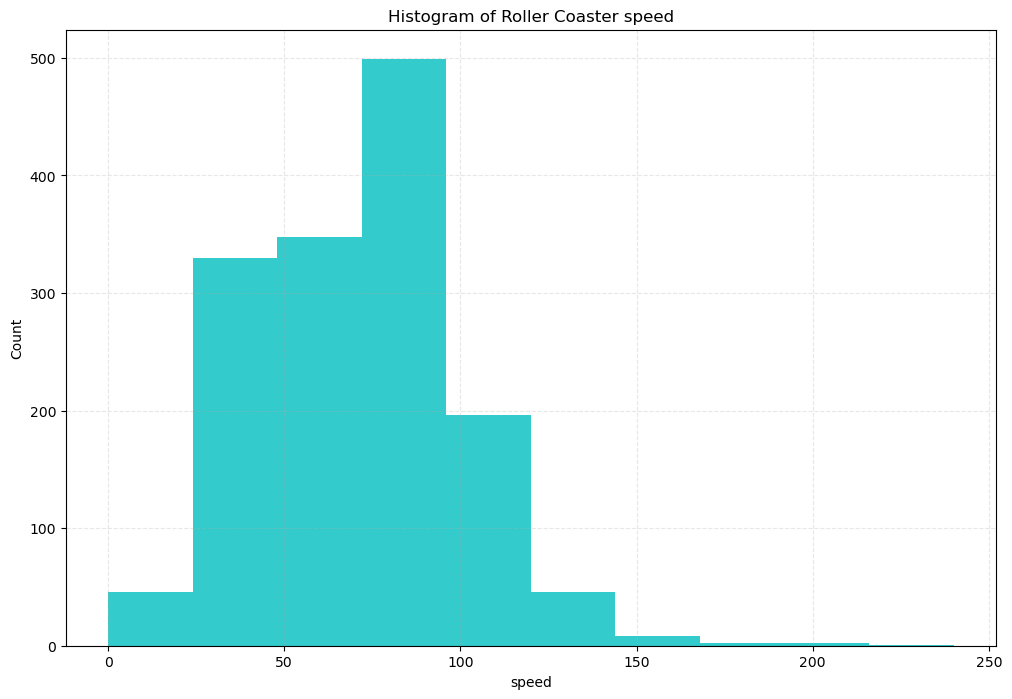

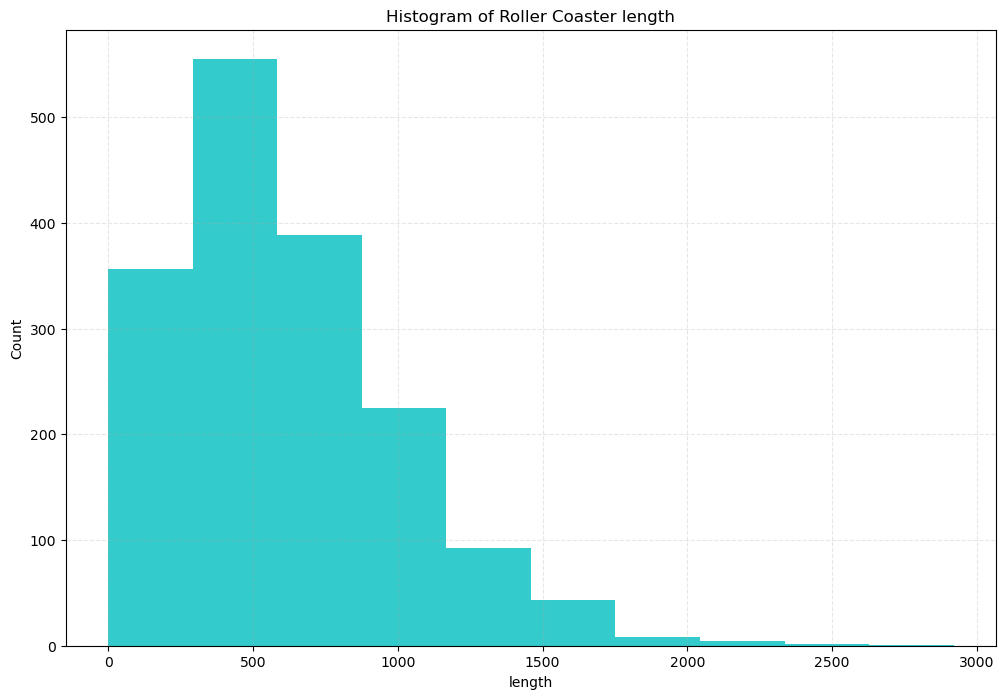

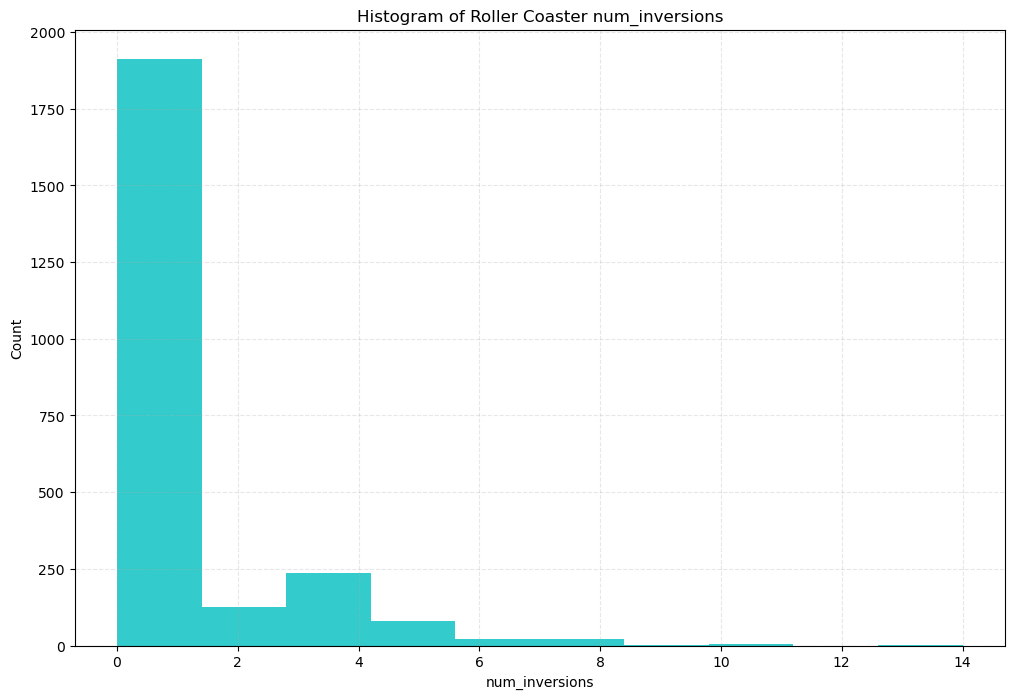

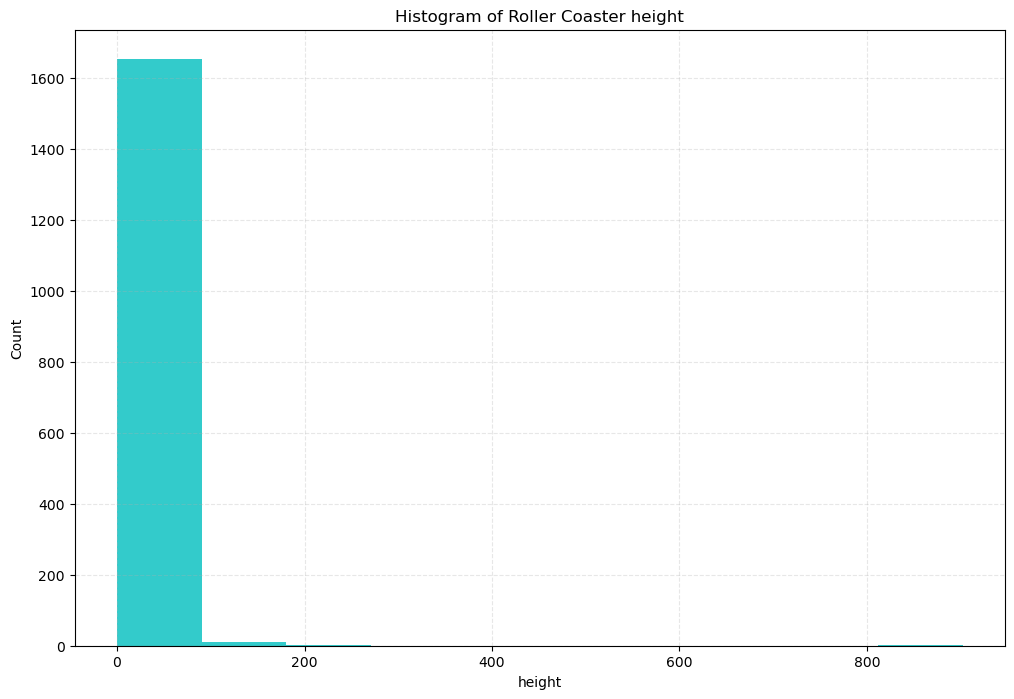

In [9]:
# 6
# Create a function to plot histogram of column values
def plot_coaster_column(column_name, coaster_df):
    
    plt.figure(figsize=(12, 8))
    plt.hist(coaster_df[column_name].dropna(),color='c', alpha=0.8)
        
    #labels and anotations
    plt.ylabel('Count')
    plt.xlabel(column_name)
    plt.title('Histogram of Roller Coaster {}'.format(column_name))
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()
    plt.clf()
    
    
# Create histogram of roller coaster speed
plot_coaster_column('speed', roller_coasters)
plt.close()

# Create histogram of roller coaster length
plot_coaster_column('length', roller_coasters)
plt.close()

# Create histogram of roller coaster number of inversions
plot_coaster_column('num_inversions', roller_coasters)
plt.close()

# Create histogram of roller coaster heights
plot_coaster_column('height', roller_coasters)
plt.close()

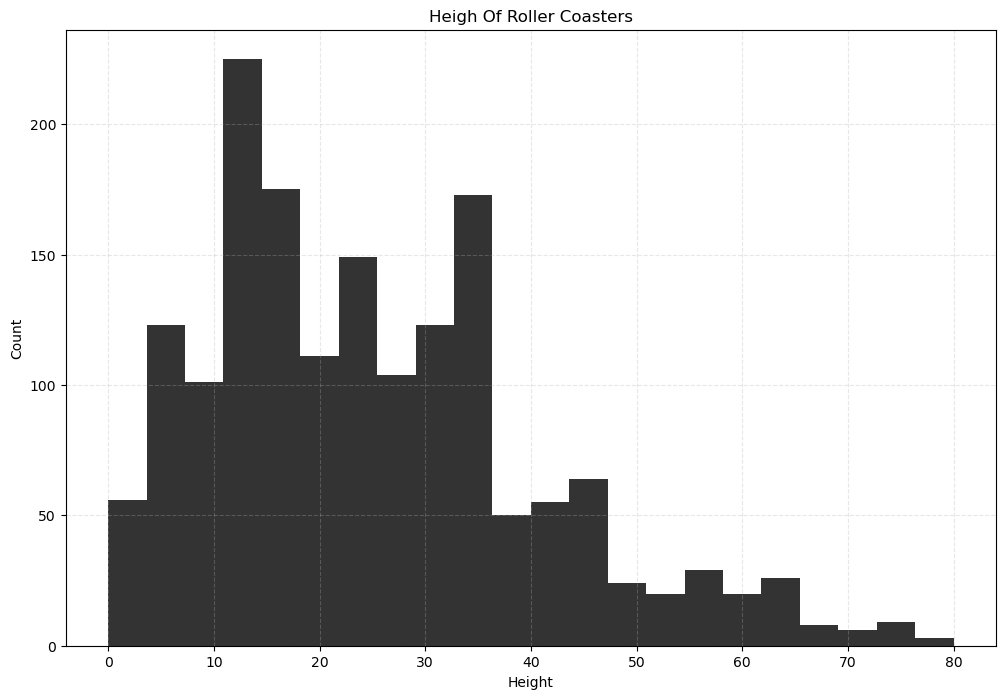

<Figure size 640x480 with 0 Axes>

In [28]:
# Create a function to plot histogram of height values
def plot_coaster_height(coaster_df):
    
    plt.figure(figsize=(12, 8))
    plt.hist(coaster_df[coaster_df['height'] <= 80]['height'].dropna(), color='k', alpha=0.8, bins=22)
        
    #labels and anotations
    plt.ylabel('Count')
    plt.xlabel('Height')
    plt.title('Heigh Of Roller Coasters')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.show()
    plt.clf()
    
# Create a histogram of roller coaster height
plot_coaster_height(roller_coasters)

7. Write a function that creates a bar chart showing the number of inversions for each roller coaster at an amusement park. Your function should take the roller coaster DataFrame and an amusement park name as arguments. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame and amusement park name.

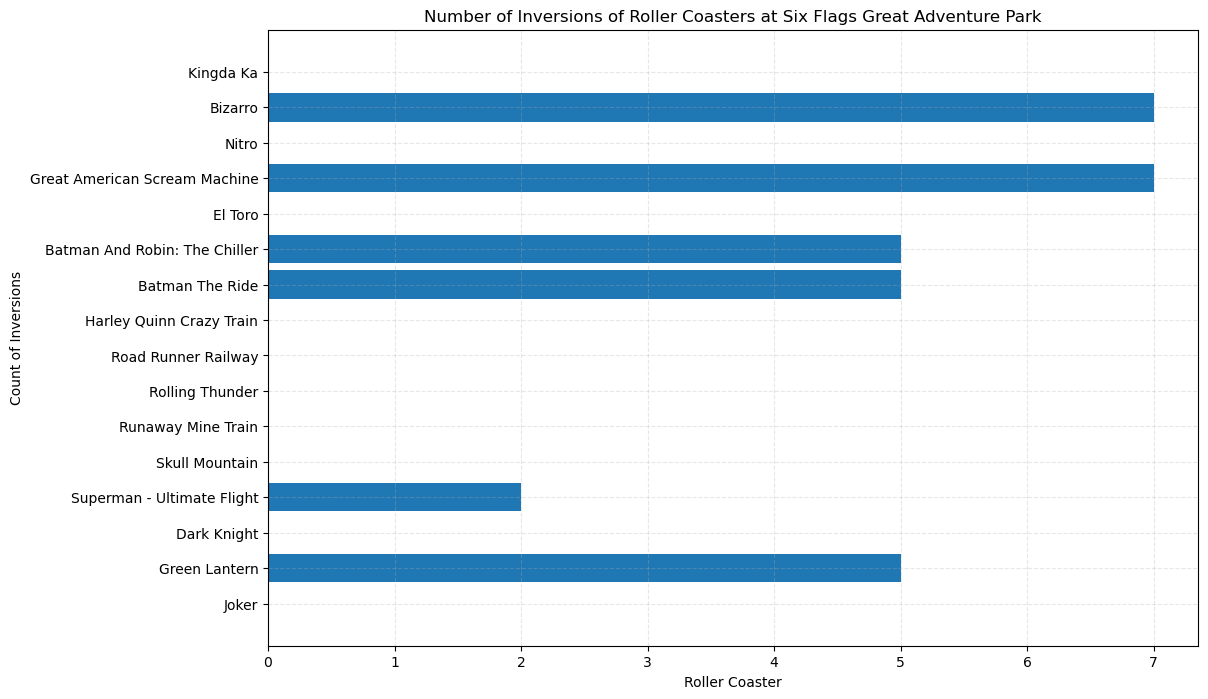

<Figure size 640x480 with 0 Axes>

In [11]:
# 7
# Create a function to plot inversions by coaster at park
def plot_coaster_inversions(park_name ,coaster_df):
    
    plt.figure(figsize=(12, 8))
    coaster_names = coaster_df[coaster_df['park'] == park_name]
    plt.barh(coaster_names['name'], coaster_names['num_inversions'])

    
    # Labels and annotations
    plt.ylabel('Count of Inversions')
    plt.xlabel('Roller Coaster')
    plt.title(f'Number of Inversions of Roller Coasters at {park_name} Park')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.gca().invert_yaxis()
    plt.show()
    plt.clf()
    
    
# Create barplot of inversions by roller coasters
plot_coaster_inversions('Six Flags Great Adventure' ,roller_coasters)

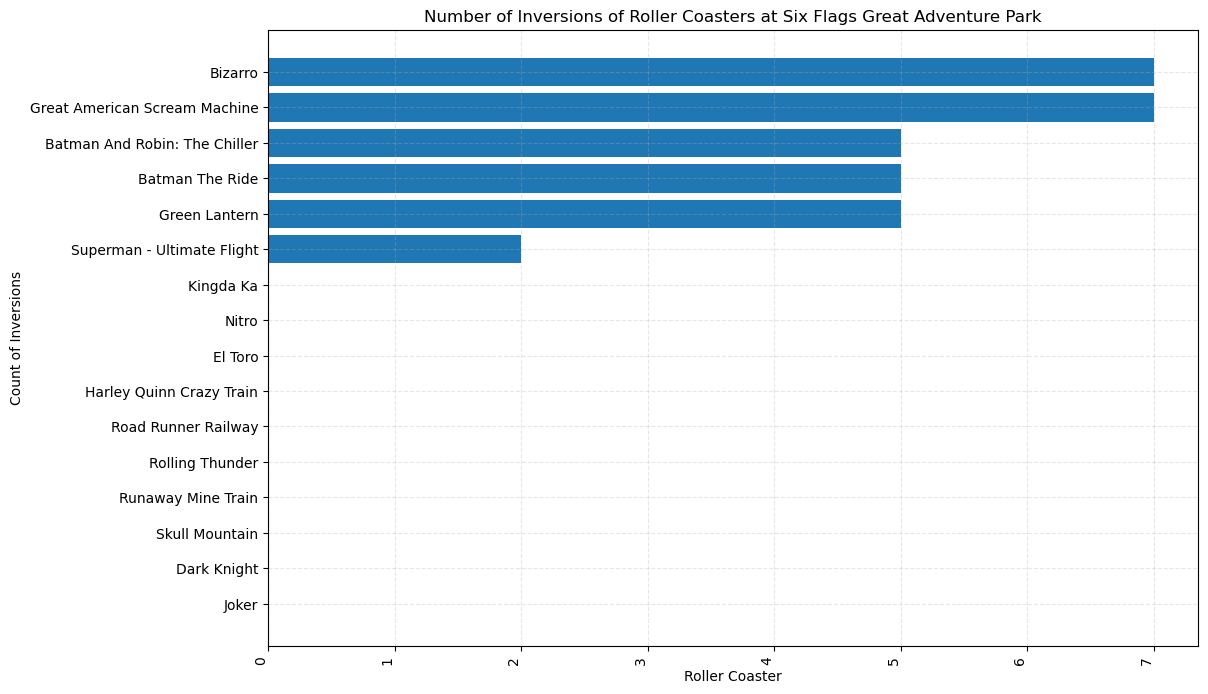

<Figure size 640x480 with 0 Axes>

In [12]:
#Chat gpt function

def plot_inversions(park_name, coaster_df):
    
    plt.figure(figsize=(12, 8))
    
    # Filter the DataFrame based on the park_name
    park_coasters = coaster_df[coaster_df['park'] == park_name]

    # Sort coaster data by number of inversions
    sorted_coasters = park_coasters.sort_values(by='num_inversions', ascending=False)

    # Plotting
    plt.barh(sorted_coasters['name'], sorted_coasters['num_inversions'])

    # Labels and annotations
    plt.ylabel('Count of Inversions')
    plt.xlabel('Roller Coaster')
    plt.title(f'Number of Inversions of Roller Coasters at {park_name} Park')
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(rotation=90, ha='right')
    plt.gca().invert_yaxis()
    plt.show()
    plt.clf()
    
    plt.savefig(f'Number of Inversions of Roller Coasters at {park_name} Park')


# Example usage
plot_inversions('Six Flags Great Adventure', roller_coasters)

8. Write a function that creates a pie chart that compares the number of operating roller coasters (`'status.operating'`) to the number of closed roller coasters (`'status.closed.definitely'`). Your function should take the roller coaster DataFrame as an argument. Make sure to include informative labels that describe your visualization.

   Call your function with the roller coaster DataFrame.

In [13]:
# Check out the roller coaster statuses
roller_coasters.status.value_counts()

status.operating             2172
status.closed.definitely      439
status.announced               42
status.construction            41
status.unknown                 34
status.closed.temporarily      25
status.relocated               22
status.retracked               16
status.rumored                 11
Name: status, dtype: int64

In [14]:
roller_coasters.head(2)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating


In [15]:
print(roller_coasters['status'].value_counts())

status.operating             2172
status.closed.definitely      439
status.announced               42
status.construction            41
status.unknown                 34
status.closed.temporarily      25
status.relocated               22
status.retracked               16
status.rumored                 11
Name: status, dtype: int64


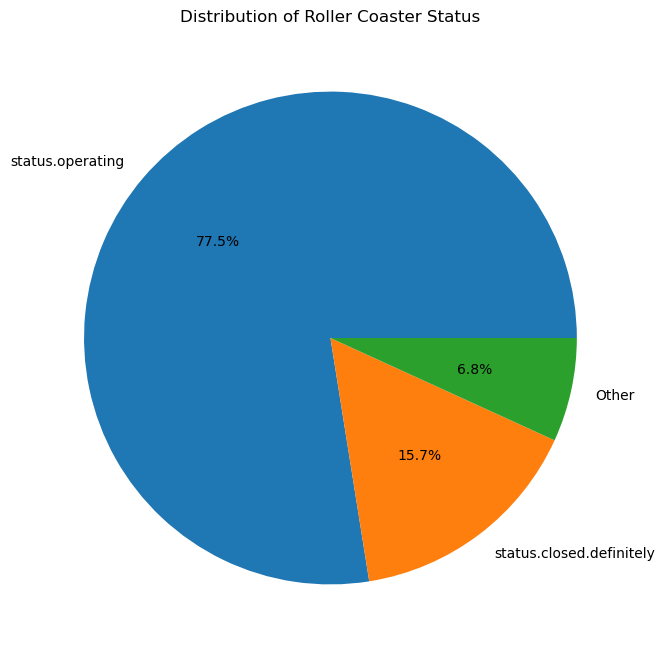

<Figure size 640x480 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt

# Create a function to plot a pie chart of status.operating
def pie_chart_status(coaster_df):
    
    plt.figure(figsize=(12, 8))
    
    # Count the occurrences of each status
    status_counts = coaster_df['status'].value_counts()

    # Combine statuses with less than 50 occurrences into 'Other'
    status_counts['Other'] = status_counts[status_counts < 50].sum()
    status_counts = status_counts[status_counts >= 50]

    # Plotting the pie chart
    plt.pie(status_counts, labels=status_counts.index, autopct='%0.1f%%')

    # Adding labels and title
    plt.title('Distribution of Roller Coaster Status')
    plt.show()
    plt.clf()

# Example usage
pie_chart_status(roller_coasters)


9. `.scatter()` is another useful function in matplotlib that you might not have seen before. `.scatter()` produces a scatter plot, which is similar to `.plot()` in that it plots points on a figure. `.scatter()`, however, does not connect the points with a line. This allows you to analyze the relationship between two variables. Find [`.scatter()`'s documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

   Write a function that creates a scatter plot of two numeric columns of the roller coaster DataFrame. Your function should take the roller coaster DataFrame and two-column names as arguments. Make sure to include informative labels that describe your visualization.
   
   Call your function with the roller coaster DataFrame and two-column names.

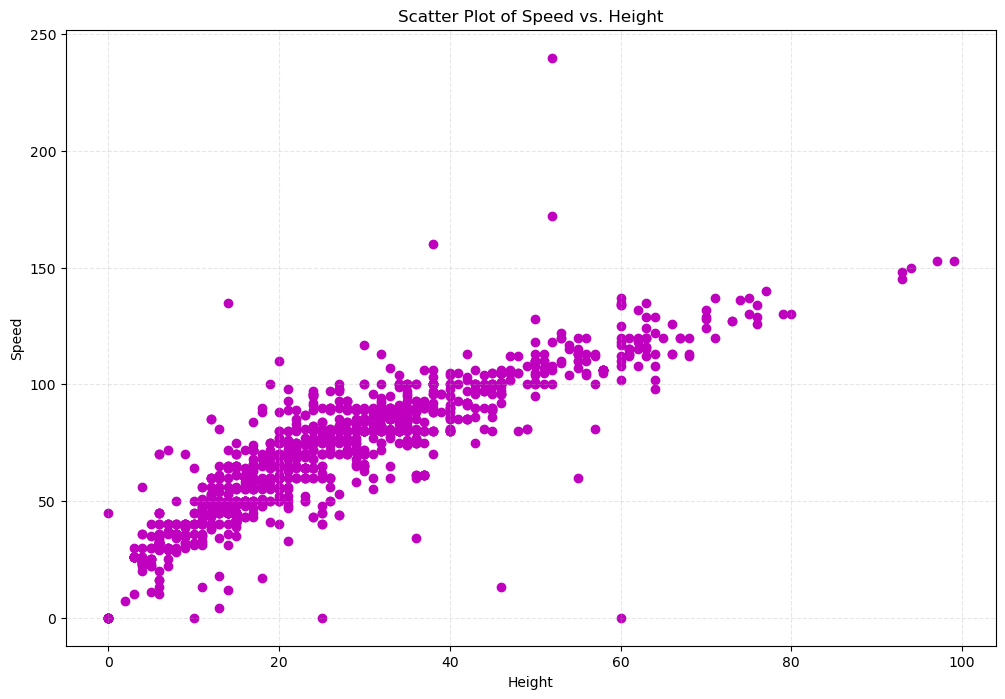

<function matplotlib.pyplot.clf()>

<Figure size 640x480 with 0 Axes>

In [32]:
# 9
# Create a function to plot scatter of any two columns
def plot_scatter(coaster_df, column_x, column_y):
    
    plt.figure(figsize=(12, 8))
    plt.scatter(x = column_x, y = column_y, data = coaster_df)
    
    # Labels and annotations
    plt.ylabel(column_y)
    plt.xlabel(column_x)
    plt.title(f'Roller Coaster {column_x} and {column_y} scatter plot')
    plt.grid(True, linestyle='--', alpha=0.3)

    
    plt.show()
    plt.clf()
    
# Create a function to plot scatter of speed vs height
def plot_scatter_height_speed(coaster_df):
    
    plt.figure(figsize=(12, 8))
    
    Low_height_roller_coasters = coaster_df[coaster_df['height'] <= 100]
    plt.scatter(x = Low_height_roller_coasters['height'], y = Low_height_roller_coasters['speed'], c = 'm')
    
    # Labels and annotations
    plt.title('Scatter Plot of Speed vs. Height')
    plt.xlabel('Height')
    plt.ylabel('Speed')
    plt.grid(True, linestyle='--', alpha=0.3)

    
    plt.show()
    plt.clf()


# Create a scatter plot of roller coaster height by speed
plot_scatter_height_speed(roller_coasters)
plt.clf

10. Part of the fun of data analysis and visualization is digging into the data you have and answering questions that come to your mind.

    Some questions you might want to answer with the datasets provided include:
    - What roller coaster seating type is most popular? And do different seating types result in higher/faster/longer roller coasters?
    - Do roller coaster manufactures have any specialties (do they focus on speed, height, seating type, or inversions)?
    - Do amusement parks have any specialties?
    
    What visualizations can you create that answer these questions, and any others that come to you? Share the questions you ask and the accompanying visualizations you create on the Codecademy forums.

In [18]:
roller_coasters.head(3)

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating


In [19]:
roller_coasters.seating_type.value_counts()

Sit Down         2217
Spinning          150
Inverted          122
Suspended          55
Alpine             43
na                 40
Water Coaster      29
Floorless          27
Flying             27
Motorbike          21
Stand Up           20
4th Dimension      18
Wing               17
Bobsleigh          11
Pipeline            5
Name: seating_type, dtype: int64

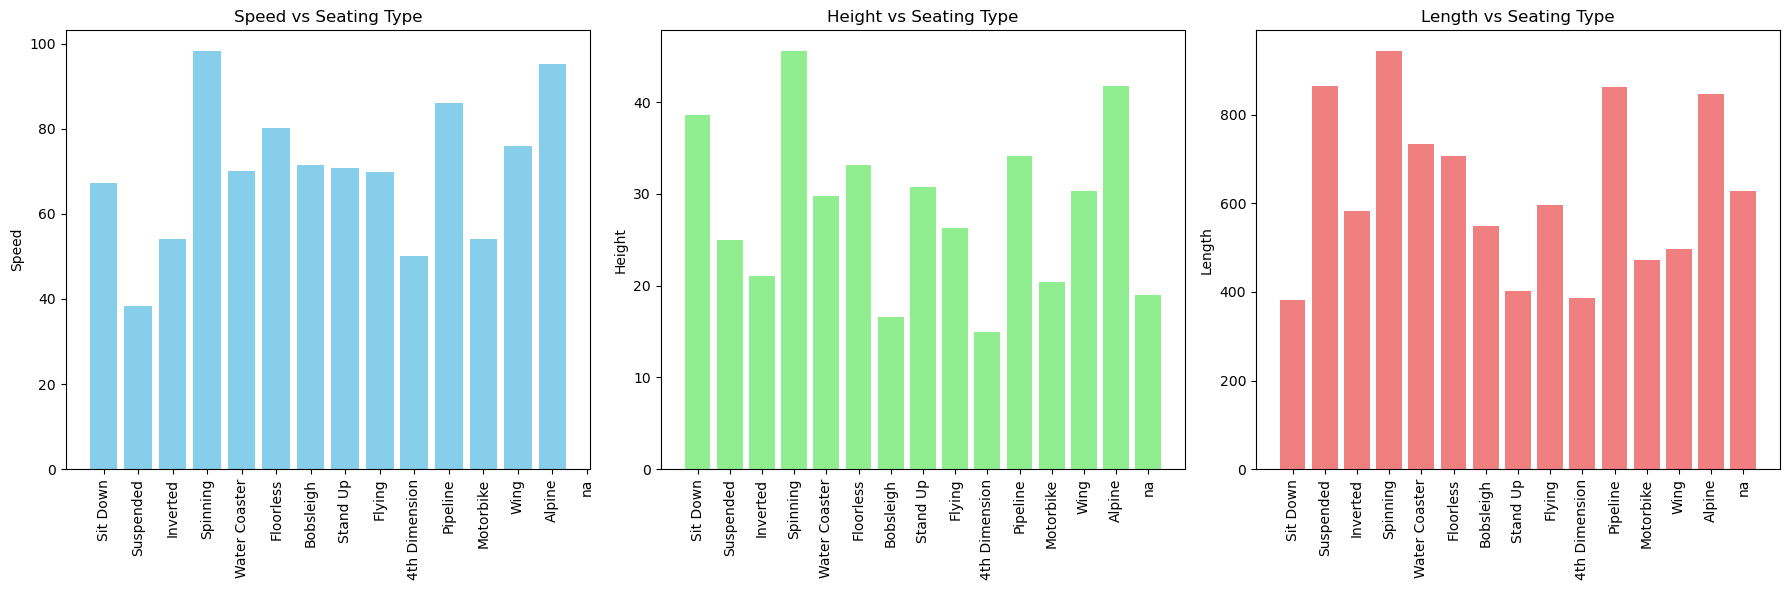

<Figure size 640x480 with 0 Axes>

In [20]:
# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plotting speed vs seating type
axes[0].bar(roller_coasters['seating_type'].unique(),
            roller_coasters.groupby('seating_type')['speed'].mean(),
            color='skyblue')
axes[0].set_title('Speed vs Seating Type')
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_ylabel('Speed')

# Plotting height vs seating type
axes[1].bar(roller_coasters['seating_type'].unique(),
            roller_coasters.groupby('seating_type')['height'].mean(),
            color='lightgreen')
axes[1].set_title('Height vs Seating Type')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylabel('Height')

# Plotting length vs seating type
axes[2].bar(roller_coasters['seating_type'].unique(),
            roller_coasters.groupby('seating_type')['length'].mean(),
            color='lightcoral')
axes[2].set_title('Length vs Seating Type')
axes[2].tick_params(axis='x', rotation=90)
axes[2].set_ylabel('Length')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()
plt.clf()


In [21]:
roller_coasters.manufacturer.value_counts()

na                    307
Vekoma                297
Zamperla              160
Intamin               152
Zierer                140
                     ... 
William Strickler       1
Holzbau Cordes          1
Sartori                 1
Beto Carrero World      1
Güven Lunapark          1
Name: manufacturer, Length: 122, dtype: int64

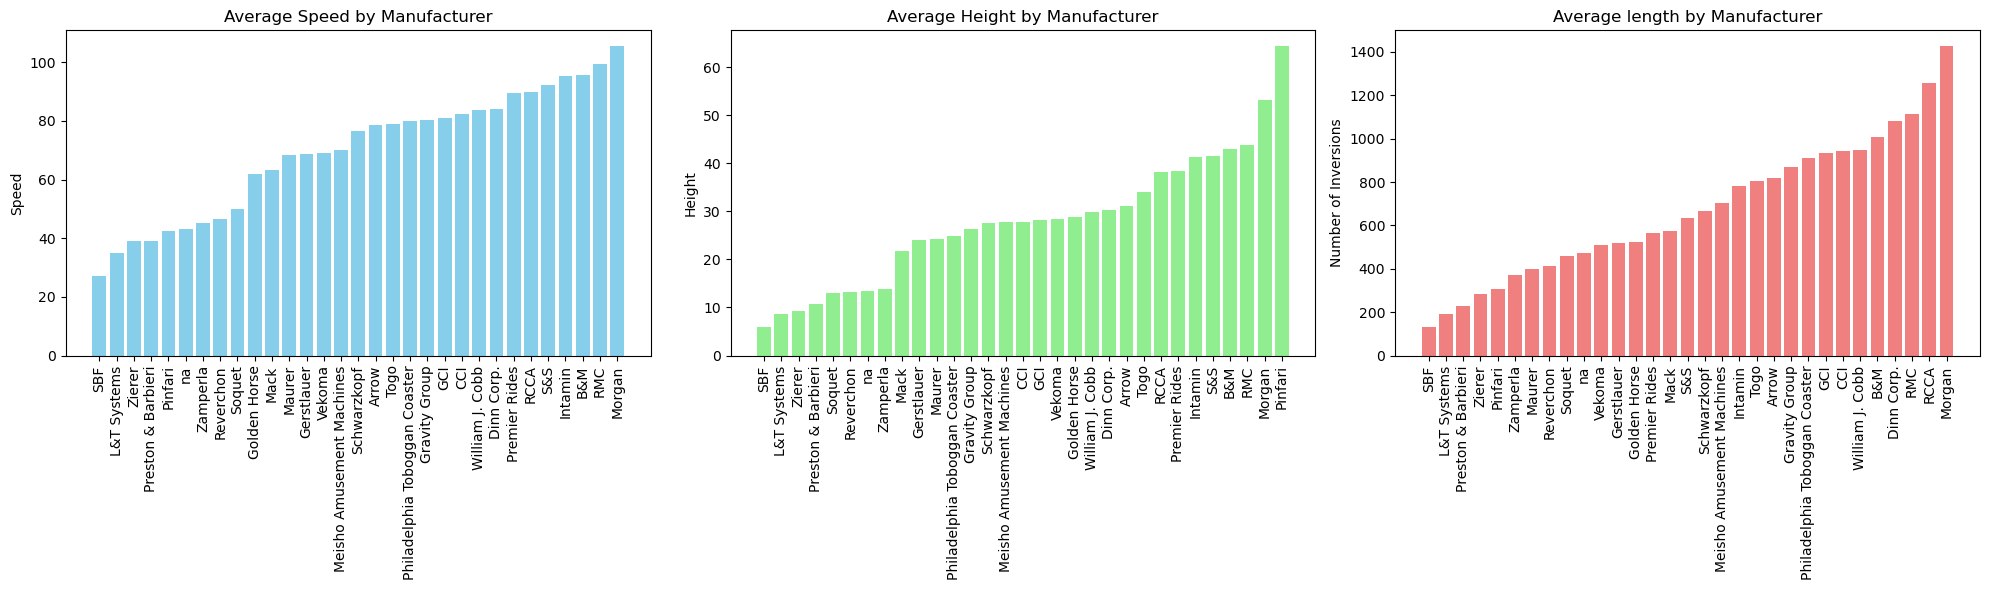

<Figure size 640x480 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

# Assuming roller_coasters contains information about speed, height, seating type, inversions, and manufacturer

# Drop rows with missing values
roller_coasters_cleaned = roller_coasters.dropna(subset=['speed', 'height', 'num_inversions', 'manufacturer'])

# Filter out manufacturers with fewer than 5 roller coasters
manufacturers_counts = roller_coasters_cleaned['manufacturer'].value_counts()
valid_manufacturers = manufacturers_counts[manufacturers_counts >= 5].index
roller_coasters_cleaned = roller_coasters_cleaned[roller_coasters_cleaned['manufacturer'].isin(valid_manufacturers)]

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plotting average speed by manufacturer
average_speed_by_manufacturer = roller_coasters_cleaned.groupby('manufacturer')['speed'].mean().sort_values()
axes[0].bar(average_speed_by_manufacturer.index, average_speed_by_manufacturer, color='skyblue')
axes[0].set_title('Average Speed by Manufacturer')
axes[0].set_ylabel('Speed')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plotting average height by manufacturer
average_height_by_manufacturer = roller_coasters_cleaned.groupby('manufacturer')['height'].mean().sort_values()
axes[1].bar(average_height_by_manufacturer.index, average_height_by_manufacturer, color='lightgreen')
axes[1].set_title('Average Height by Manufacturer')
axes[1].set_ylabel('Height')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plotting average number of inversions by manufacturer
average_inversions_by_manufacturer = roller_coasters_cleaned.groupby('manufacturer')['length'].mean().sort_values()
axes[2].bar(average_inversions_by_manufacturer.index, average_inversions_by_manufacturer, color='lightcoral')
axes[2].set_title('Average length by Manufacturer')
axes[2].set_ylabel('Number of Inversions')
axes[2].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout()
plt.savefig('Manufacture vs ')

# Show the plots
plt.show()
plt.clf()


In [42]:
roller_coasters.park.value_counts()

Foire                        121
Six Flags Magic Mountain      24
Kings Island                  23
Cedar Point                   22
Alton Towers                  18
                            ... 
Old MacDonald's Farm           1
Schloss Beck Freizeitpark      1
Family Fun Fair                1
Pavilion Fun Park              1
Universal's Epic Universe      1
Name: park, Length: 718, dtype: int64

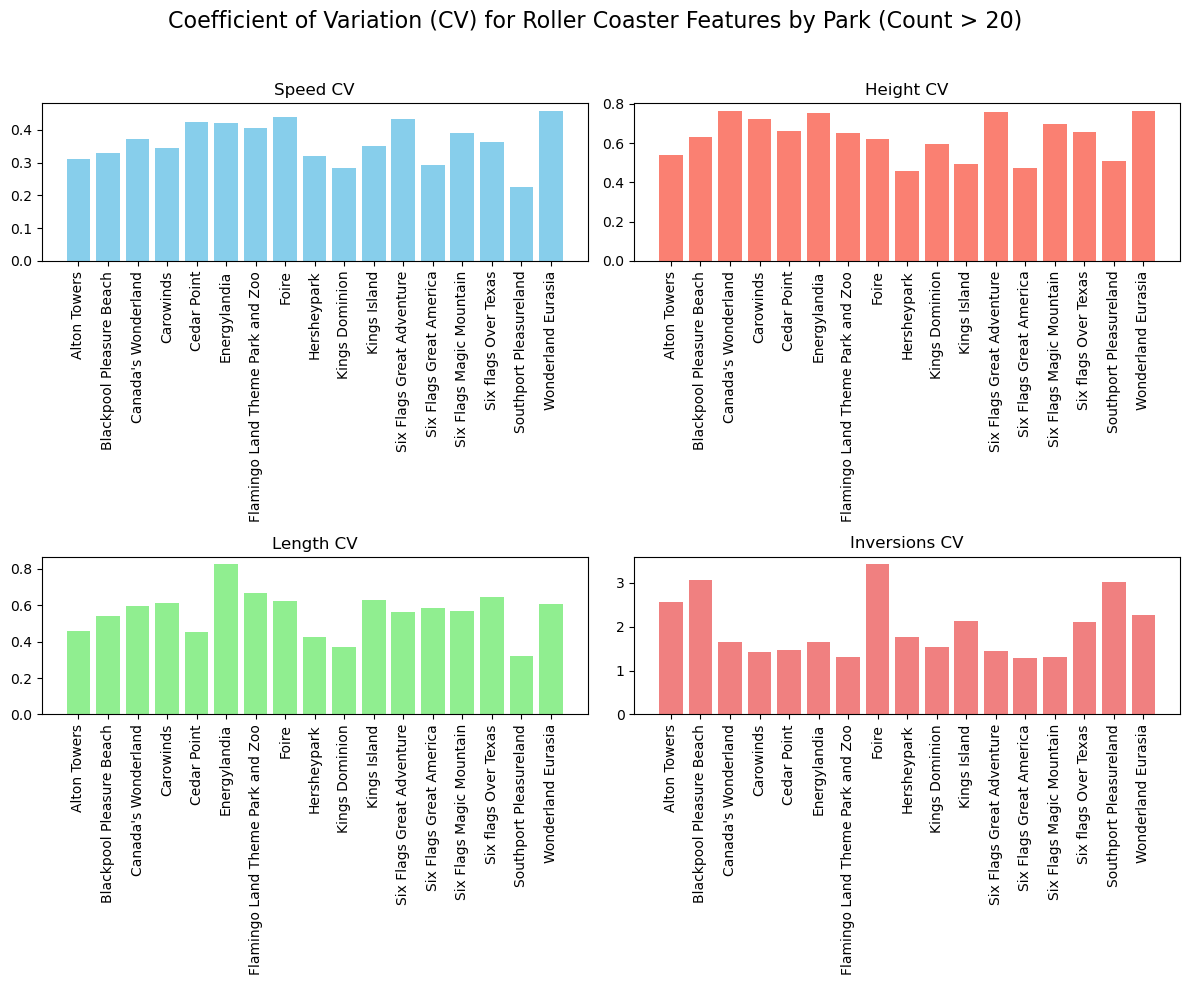

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming roller_coasters contains information about parks and their roller coasters

# Filter parks with value counts > 20
valid_parks = roller_coasters['park'].value_counts()[roller_coasters['park'].value_counts() > 15].index

# Filter roller_coasters for the valid parks
valid_roller_coasters = roller_coasters[roller_coasters['park'].isin(valid_parks)]

# Group by park and calculate mean and standard deviation
park_stats = valid_roller_coasters.groupby('park').agg({
    'speed': ['mean', 'std'],
    'height': ['mean', 'std'],
    'length': ['mean', 'std'],
    'num_inversions': ['mean', 'std']
}).reset_index()

# Calculate coefficient of variation (CV)
park_stats['speed_cv'] = park_stats['speed']['std'] / park_stats['speed']['mean']
park_stats['height_cv'] = park_stats['height']['std'] / park_stats['height']['mean']
park_stats['length_cv'] = park_stats['length']['std'] / park_stats['length']['mean']
park_stats['inversions_cv'] = park_stats['num_inversions']['std'] / park_stats['num_inversions']['mean']

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Coefficient of Variation (CV) for Roller Coaster Features by Park (Count > 20)', fontsize=16)

# Speed
axes[0, 0].bar(park_stats['park'], park_stats['speed_cv'], color='skyblue')
axes[0, 0].set_title('Speed CV')
axes[0, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Height
axes[0, 1].bar(park_stats['park'], park_stats['height_cv'], color='salmon')
axes[0, 1].set_title('Height CV')
axes[0, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Length
axes[1, 0].bar(park_stats['park'], park_stats['length_cv'], color='lightgreen')
axes[1, 0].set_title('Length CV')
axes[1, 0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Inversions
axes[1, 1].bar(park_stats['park'], park_stats['inversions_cv'], color='lightcoral')
axes[1, 1].set_title('Inversions CV')
axes[1, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

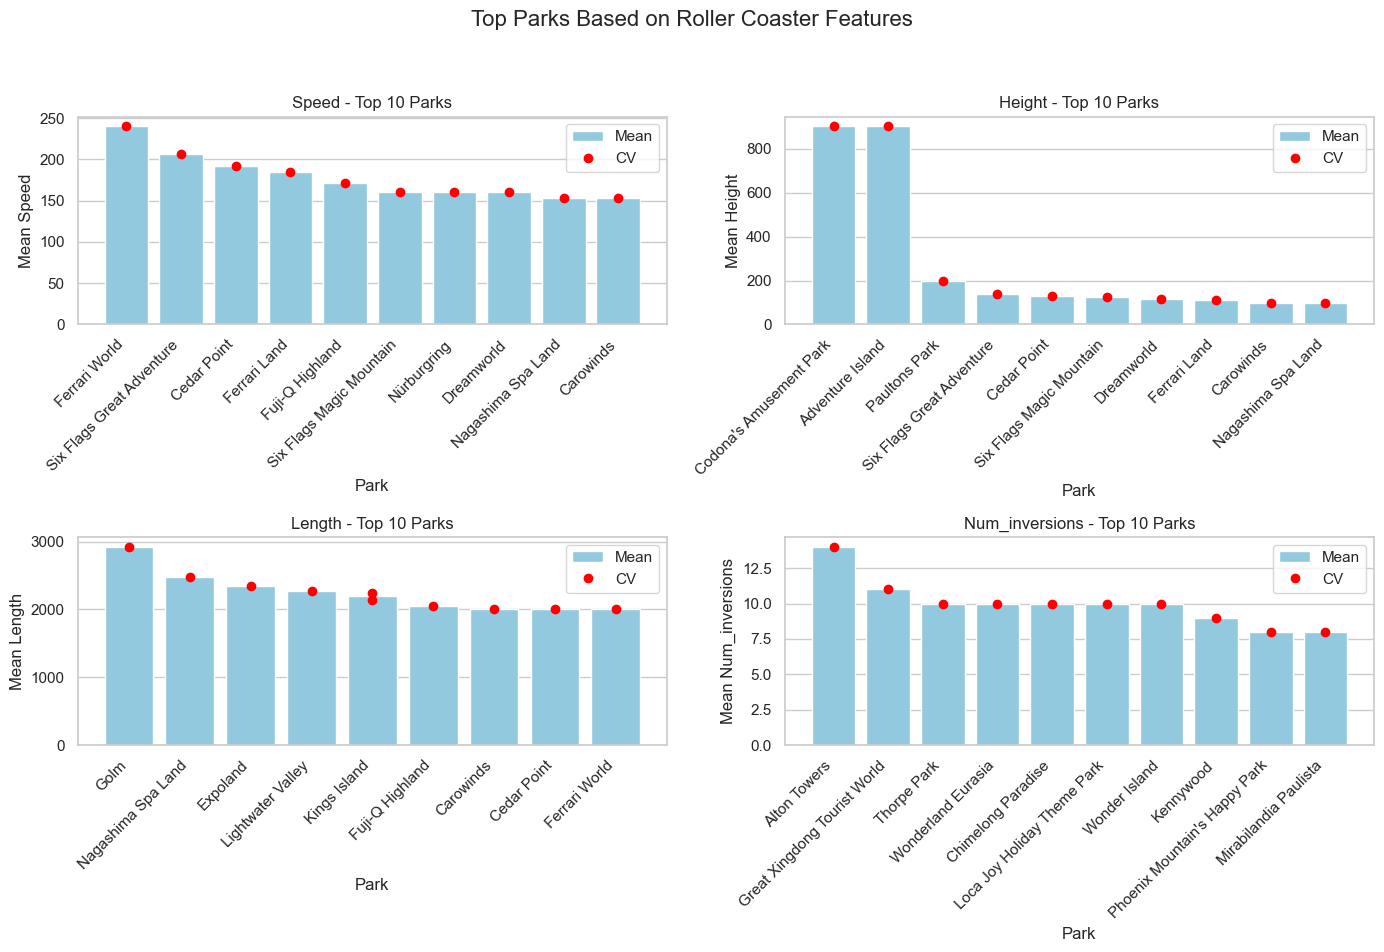

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
# Replace this line with your actual DataFrame
your_dataframe = roller_coasters

# Set Seaborn style
sns.set(style="whitegrid")

# Create a side-by-side bar plot for each roller coaster feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Top Parks Based on Roller Coaster Features', fontsize=16)

features = ['speed', 'height', 'length', 'num_inversions']
for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    ax = axes[row, col]

    # Sort the DataFrame by CV for the current feature
    sorted_df = your_dataframe.sort_values(f'{feature}', ascending=False).head(10)

    # Plotting mean with error bars
    sns.barplot(x='park', y=f'{feature}', data=sorted_df, ax=ax, color='skyblue', label='Mean')
    ax.errorbar(x=sorted_df['park'], y=sorted_df[f'{feature}'], fmt='o', color='red', label='CV')

    # Set labels and title
    ax.set_xlabel('Park')
    ax.set_ylabel(f'Mean {feature.capitalize()}')
    ax.set_title(f'{feature.capitalize()} - Top 10 Parks')

    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Show legend
    ax.legend()

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()
